In [8]:
cl="sk-UprRGG0GqQS37uH47aA0E8366b2b4c9aBbFc9c293e72A882"
url = "https://xqtd520qidong.com/v1/chat/completions"
import csv
import requests
import re
from openai import OpenAI
import httpx
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

headers = {"Authorization": cl,"content-type": "application/json"}

def evaluate_classification_performance(label, prediction):
    
    precision = precision_score(label, prediction)
    recall = recall_score(label, prediction)
    f1 = f1_score(label, prediction)
    accuracy = accuracy_score(label, prediction)
    return precision, recall, f1, accuracy


def extract(all):
    i=0
    GPTinferP=[]
    for x in all:
        outputs = re.findall(r'[**]*output[:]*[**]*\s*(\d)', x, re.IGNORECASE)
        ls = [int(output) for output in outputs]
        print(i,ls,len(ls))
        GPTinferP+=ls
        i+=1
    print(len(GPTinferP))
    return GPTinferP



# 1 Homographic Puns(语义双关语)


In [2]:
#load data
import json
with open('Homo.json', 'r') as file:
    raw = json.load(file)
print(len(raw))

225


In [3]:
raw[0]

"1.They hid from the gunman in a sauna where they could sweat it out .\n2.Wal - Mart isn ' t the only saving place !\n3.Can honeybee abuse lead to a sting operation ?\n4.A ditch digger was entrenched in his career .\n5.She was only a Blacksmith ' s daughter , but she knew how to forge ahead .\n6.86 of Borg : You will be assimilated . Would you believe , stood close to ?\n7.Did you hear about the new pinata ? It ' s a huge hit .\n8.A bank manager who was also a high jumper spent most of his time in the vault .\n9.A discussion of digging a new mine shaft was too deep for him .\n10.She was suspected of stealing a brooch but they couldn ' t pin it on her ."

In [12]:
#prompt
prompt="""
I will provide a list of sentences, each separated by a newline ('\\n').
Your task is to analyze each sentence to determine if it contains any pun.
For each sentence, explain your reasoning and write 'output:1' if it contains a pun, else 
write 'output:0'  in the next line.Make sure your analysis is clear and concise. for example:
INPUT:
1.Broken pencils are pointless.
2.He is very successful.
3.I was a banker, but I lost interest.
OUTPUT:
1.Broken pencils are pointless.
"pointless" here means both "lacks a sharp point" and "something without purpose or use"
output:1
2.He is very successful.
no pun here
output:0
3.I was a banker, but I lost interest.
"interest" here means both "extra money" and "wanting to know or learn about something"
output:1
"""
all=[]

In [15]:
# ann=[]
start=len(all)
for p in raw[start:]:
    data = { "messages": [{"role": "user","content": prompt+p,}], "model": "claude-3-opus-20240229",}
    dat = json.loads((requests.post(url, headers=headers, json=data)).text)
    content =  dat["choices"][0]["message"]["content"]
    print(len(all),end=',')
    all.append(content)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,

In [78]:
import json
j = 0
data = { "messages": [{"role": "user","content": prompt+raw[j],}], "model": "claude-3-opus-20240229",}
dat = json.loads((requests.post(url, headers=headers, json=data)).text)
content =  dat["choices"][0]["message"]["content"]
all[j]=content

In [ ]:
claudeHom=extract(all)

In [20]:
# save
import json
with open("Hom/Claude(hom).json", "w") as outfile:  
    json.dump(claudeHom, outfile) 

# 2 Heterographic Puns(谐音双关语)

In [1]:
#load data
import json
with open('Hetero.json', 'r') as file:
    raw = json.load(file)
print(len(raw))

178


In [2]:
#prompt
prompt="""
I will provide a list of sentences, each separated by a newline ('\\n').
Your task is to analyze each sentence to determine if it contains any Heterographic pun.
For each sentence, explain your reasoning and write 'output:1' if it contains a Heterographic pun,
else write 'output:0'  in the next line. Make sure your analysis is clear and concise. for example:
INPUT:
1.When the church bought gas for their annual barbecue, proceeds went from the sacred to the propane.
2.He is very successful.
3.I'm on a seafood diet. I see food, and I eat it
OUTPUT:
1.When the church bought gas for their annual barbecue, proceeds went from the sacred to the propane.
The word "propane" is used in place of "profane," 
output:1
2.He is very successful.
no pun here
output:0
3.I'm on a seafood diet. I see food, and I eat it
"Seafood" and "see food" are homophones
output:1
"""
all=[]

In [ ]:
# ann=[]
start=len(all)
for p in raw[start:]:
    data = { "messages": [{"role": "user","content": prompt+p,}], "model": "claude-3-opus-20240229",}
    dat = json.loads((requests.post(url, headers=headers, json=data)).text)
    content =  dat["choices"][0]["message"]["content"]
    print(len(all),end=',')
    all.append(content)

In [ ]:
# save
cld=extract(all)

In [ ]:
# save
import json
with open("Het/Claude-2.json", "w") as outfile:  
    json.dump(gpt, outfile) 

# <font color='red'> Delete the following content </font>

In [109]:
with open('Het/Gemini(het).json', 'r') as file:
    gemhet = json.load(file)
with open('Het/GPT3(het).json', 'r') as file:
    gpt3het = json.load(file)
with open('Het/GPT4(het)turbo.json', 'r') as file:
    gpt4het = json.load(file)
###################################################################
with open('Hom/GPT3(hom).json', 'r') as file:
    gpt3hom = json.load(file)
with open('Hom/GPT4(hom).json', 'r') as file:
    gpt4hom = json.load(file)
with open('Hom/Gemini(hom).json', 'r') as file:
    gemhom = json.load(file)

In [111]:
#load data
import json
with open('HomoLabel.json', 'r') as file:
    hom = json.load(file)
with open('HeteroLabel.json', 'r') as file:
    het = json.load(file)
# print(len(label))
print("Hererographic:")
print("GPT-3.5:",evaluate_classification_performance(het,gpt3het))
print("Gemini :",evaluate_classification_performance(het,gemhet))
print("GPT-4  :",evaluate_classification_performance(het,gpt4het))
# print(evaluate_classification_performance(het,gpt42))
# print(evaluate_classification_performance(gpt41,gpt42))
print('-'*99)
print("Homographic:")
print("GPT-3.5:",evaluate_classification_performance(hom,gpt3hom))
print("Gemini :",evaluate_classification_performance(hom,gemhom))
print("GPT-4  :",evaluate_classification_performance(hom,gpt4hom))

Hererographic:
GPT-3.5: (0.8597785977859779, 0.7332808811959087, 0.7915074309978769, 0.7241573033707865)
Gemini : (0.9217462932454695, 0.8804091266719118, 0.9006036217303823, 0.8612359550561798)
GPT-4  : (0.9775583482944344, 0.8568056648308419, 0.9132075471698112, 0.8837078651685393)
---------------------------------------------------------------------------------------------------
Homographic:
GPT-3.5: (0.8418918918918918, 0.7753578095830741, 0.8072562358276645, 0.7355555555555555)
Gemini : (0.9058963668850506, 0.9464841319228375, 0.9257455873402313, 0.8915555555555555)
GPT-4  : (0.9405506883604505, 0.9352831362787803, 0.9379095163806553, 0.9115555555555556)


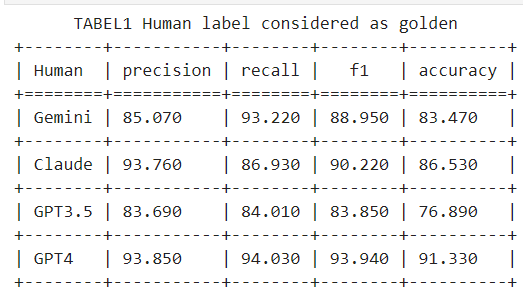

In [22]:
import json
str="""
print out the following sentence's WordNet 3.1 sense keys for the pun word:
I was a banker, but I lost interest.
"""
data = {"messages": [{"role": "user","content": str,}], "model": "claude-3-opus-20240229",}
dat = json.loads((requests.post(url, headers=headers, json=data)).text)
content =  dat["choices"][0]["message"]["content"]
print(content)

 Here are the WordNet 3.1 sense keys for the pun word "interest" in the sentence "I was a banker, but I lost interest.":

1. interest%1:09:00:: (a sense of concern with and curiosity about someone or something)
2. interest%1:21:00:: (a fixed charge for borrowing money; usually a percentage of the amount borrowed)

In this pun, the word "interest" is used in two different senses:

1. The first sense refers to the banker's enthusiasm or engagement in their job.
2. The second sense refers to the financial concept of interest, which is a core aspect of a banker's profession.

The humor in the pun arises from the intentional ambiguity created by using a single word with multiple relevant meanings.
